In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy

# data processing

In [2]:
dataset = pd.read_csv(r'D:\yuce-remove-di.csv',encoding="ISO-8859-1")
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unemployed                   893 non-null    int64
 1   In employment                893 non-null    int64
 2   Age of first drug use,<18    893 non-null    int64
 3   Age of first drug use,18-25  893 non-null    int64
 4   Total time,6-10              893 non-null    int64
 5   Difficult                    893 non-null    int64
 6   Easy                         893 non-null    int64
 7   Drug craving                 893 non-null    int64
 8   Impulsive personality        893 non-null    int64
 9   Active coping                893 non-null    int64
 10  Negative coping              893 non-null    int64
 11  Depression,no                893 non-null    int64
 12  Depression,yes               893 non-null    int64
 13  Anxiety,no                   893 non-null    int64

,Unemployed,In employment,"Age of first drug use,<18","Age of first drug use,18-25","Total time,6-10",Difficult,Easy,Drug craving,Impulsive personality,Active coping,...,"Anxiety,no","Anxiety,yes","Traumatic events,no","Traumatic events,yes",General satisfaction,Physical neglect,Emotional abuse,Emotional neglect,Sexual abuse,Relapse
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,...,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,0.614782,0.385218,0.384099,0.556551,0.473684,0.680851,0.319149,9.496081,27.381859,20.270997,...,0.566629,0.433371,0.695409,0.304591,0.107503,10.900336,6.113102,12.974244,5.740202,0.845465
std,0.486920,0.486920,0.486654,0.497070,0.499587,0.466408,0.466408,3.902000,3.764179,4.814545,...,0.495818,0.495818,0.460492,0.460492,0.309925,2.764308,1.855055,6.160449,1.671351,0.361664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,19.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,25.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,8.000000,5.000000,1.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,9.000000,26.000000,20.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5.000000,11.000000,5.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,30.000000,24.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,13.000000,7.000000,18.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,36.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,15.000000,23.000000,14.000000,1.000000


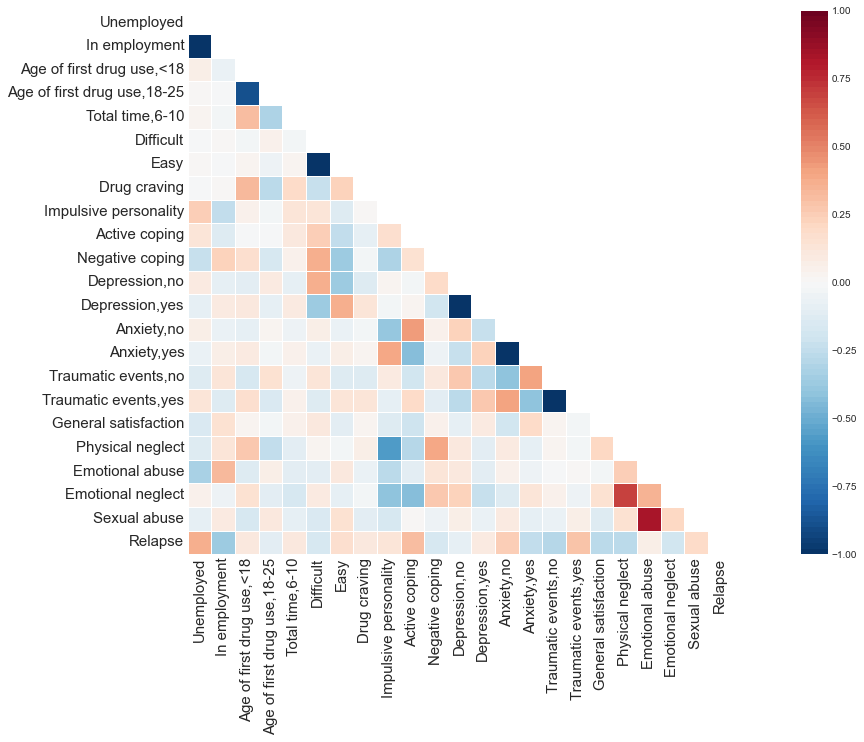

In [3]:
# Create a correlation plot of both datasets.
import seaborn as sns
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);
font1 = {
# 'weight' : 'normal',
'size' : 15,
}
plt.tick_params(labelsize=15)
plt.xlabel('',fontsize=20)
plt.ylabel('',fontsize=20)
plt.savefig('0.png',dpi=600,bbox_inches="tight")
plt.show()

In [4]:
feat_labels = dataset.columns[:22]

In [5]:
print(feat_labels)

Index(['Unemployed', 'In employment', 'Age of first drug use,<18',
       'Age of first drug use,18-25', 'Total time,6-10', 'Difficult', 'Easy',
       'Drug craving', 'Impulsive personality', 'Active coping',
       'Negative coping', 'Depression,no', 'Depression,yes', 'Anxiety,no',
       'Anxiety,yes', 'Traumatic events,no', 'Traumatic events,yes',
       'General satisfaction', 'Physical neglect', 'Emotional abuse',
       'Emotional neglect', 'Sexual abuse'],
      dtype='object')


In [6]:
y = dataset['Relapse']
X = dataset.drop(['Relapse'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# SMOTE-Data enhancements

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
X_resample_train, y_resample_train = SMOTE().fit_resample(X_train, y_train)
print ('The number of transactions after resampling : ' + str(len(X_resample_train)))
print ('Is the number of fraudulent transaction is equal to the number of normal tansactions? ' + str(sum(y_resample_train == 0) == sum(y_resample_train == 1)))

The number of transactions after resampling : 1038
Is the number of fraudulent transaction is equal to the number of normal tansactions? True


In [9]:
from collections import Counter
print('Before SMOTE:',Counter(y_train))
print('After SMOTE:',Counter(y_resample_train))

Before SMOTE: Counter({1: 519, 0: 106})
After SMOTE: Counter({1: 519, 0: 519})


In [10]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_resample_train)
X_resample_train = scaler.transform(X_resample_train)  
X_test = scaler.transform(X_test) 

# Data presentation

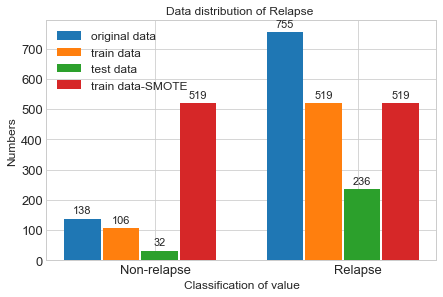

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

config = {
            "font.family": 'serif',
            "font.size": 12,
            "mathtext.fontset": 'stix',
            "font.serif": ['SimSun'],
         }
labels = ['Non-relapse', 'Relapse']
a = [138, 755]
b = [106, 519]
c = [32, 236]
d = [519, 519]
x = np.arange(len(labels))  
width = 0.18  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*2, a, width, label='original data')
rects2 = ax.bar(x - width+0.01, b, width, label='train data')
rects3 = ax.bar(x + 0.02, c, width, label='test data')
rects4 = ax.bar(x + width+ 0.03, d, width, label='train data-SMOTE')

ax.set_title('Data distribution of Relapse ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=11)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
font1 = {'family':'Arial' ,
         'weight': 'normal',
         'size': 12,
         };   

plt.tick_params(labelsize=13)
plt.legend(prop=font1)
plt.xlabel('Classification of value',font1)
plt.ylabel('Numbers',font1)
plt.savefig('data.png',dpi=600,bbox_inches="tight")
plt.show()

# Machine learning models

# LR

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10,
                   class_weight=None,
                   dual=False, 
                   fit_intercept=True,
                   intercept_scaling=1, 
                   max_iter=100, 
                   multi_class='ovr',
                   n_jobs=1,
                   penalty='l2',
                   random_state=None, 
                   solver='liblinear',
                   tol=0.0001,
                   verbose=0, 
                   warm_start=False)

lr.fit(X_resample_train,y_resample_train)
y_pre_log = lr.predict(X_test)

lr_scores:
               precision    recall  f1-score   support

         不复吸       0.45      0.94      0.61        32
         又复吸       0.99      0.85      0.91       236

    accuracy                           0.86       268
   macro avg       0.72      0.89      0.76       268
weighted avg       0.93      0.86      0.88       268



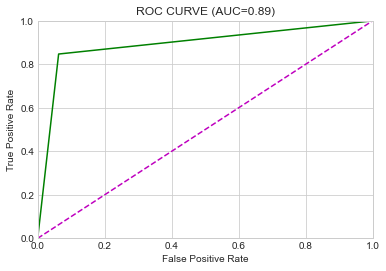

In [13]:
from sklearn.metrics import classification_report, roc_auc_score
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
lr_scores = classification_report(y_test, y_pre_log, labels=(0, 1), target_names=("不复吸", "又复吸"))
print("lr_scores:\n", lr_scores)

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt


FPR,TPR,threshold=roc_curve(y_test,y_pre_log,pos_label=1)

AUC=auc(FPR,TPR)
plt.figure()
plt.title('ROC CURVE (AUC={:.2f})'.format(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='g')
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.show()

# SVM

svc_scores:
               precision    recall  f1-score   support

         不复吸       0.86      1.00      0.93        32
         又复吸       1.00      0.98      0.99       236

    accuracy                           0.98       268
   macro avg       0.93      0.99      0.96       268
weighted avg       0.98      0.98      0.98       268



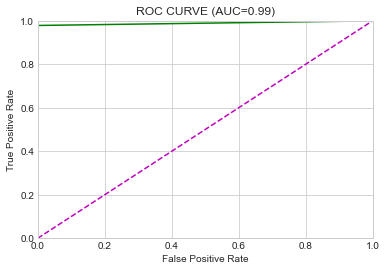

In [14]:
svc_classifier = SVC(kernel = 'linear', C = 10, Probability = 3, shrinking = True)
svc_classifier.fit(X_resample_train,y_resample_train)

y_pre_SVM = svc_classifier.predict(X_test)
from sklearn.metrics import classification_report, roc_auc_score
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
svc_scores = classification_report(y_test, y_pre_SVM, labels=(0, 1), target_names=("不复吸", "又复吸"))
print("svc_scores:\n", svc_scores)

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt


FPR,TPR,threshold=roc_curve(y_test,y_pre_SVM,pos_label=1)

AUC=auc(FPR,TPR)
plt.figure()
plt.title('ROC CURVE (AUC={:.2f})'.format(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='g')
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.show()

# DT

In [15]:
dt_classifier = DecisionTreeClassifier(max_features = 30, random_state = 10,
                                           criterion="gini",
                                         splitter="random",
                                         max_depth=None,
                                         min_samples_split=0.199,
                                         min_samples_leaf=1,
                                         min_impurity_decrease=0.03,
                                         min_weight_fraction_leaf=0.02 )
dt_classifier.fit(X_resample_train, y_resample_train)

dt_scores:
               precision    recall  f1-score   support

         不复吸       0.42      1.00      0.59        32
         又复吸       1.00      0.81      0.89       236

    accuracy                           0.83       268
   macro avg       0.71      0.90      0.74       268
weighted avg       0.93      0.83      0.86       268



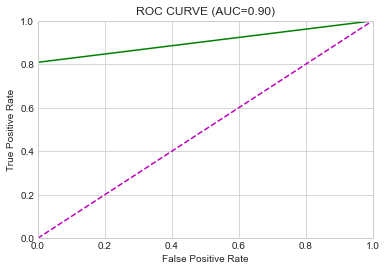

In [18]:
y_pre_dec = dt_classifier.predict(X_test)
from sklearn.metrics import classification_report, roc_auc_score
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dt_scores = classification_report(y_test, y_pre_dec, labels=(0, 1), target_names=("不复吸", "又复吸"))
print("dt_scores:\n", dt_scores)

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
FPR,TPR,threshold=roc_curve(y_test,y_pre_dec,pos_label=1)

AUC=auc(FPR,TPR)
plt.figure()
plt.title('ROC CURVE (AUC={:.2f})'.format(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='g')
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.show()

# RF

In [30]:
clf = RandomForestClassifier(max_depth = 5, n_estimators = 100, 
                             criterion = 'gini', random_state = 0)

rf_scores:
               precision    recall  f1-score   support

         不复吸       0.91      1.00      0.96        32
         又复吸       1.00      0.99      0.99       236

    accuracy                           0.99       268
   macro avg       0.96      0.99      0.97       268
weighted avg       0.99      0.99      0.99       268



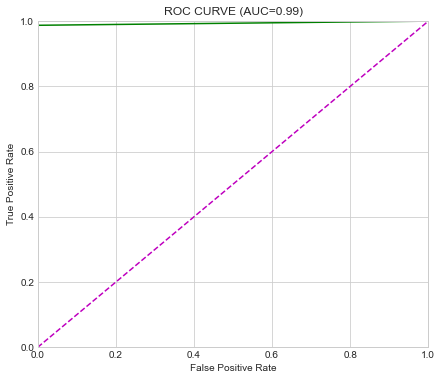

In [20]:
y_pre_randomtree = rf_classifier.predict(X_test)
from sklearn.metrics import classification_report, roc_auc_score
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
rf_scores = classification_report(y_test, y_pre_randomtree, labels=(0, 1), target_names=("不复吸", "又复吸"))
print("rf_scores:\n", rf_scores)

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 7, 6
FPR,TPR,threshold=roc_curve(y_test,y_pre_randomtree,pos_label=1)

AUC=auc(FPR,TPR)
plt.figure()
plt.title('ROC CURVE (AUC={:.2f})'.format(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='g')
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.show()

# ANN

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=22))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.fit(X_resample_train, y_resample_train,epochs=300)

Epoch 1/300
33/33 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.5857
Epoch 2/300
33/33 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.6802
Epoch 3/300
33/33 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8382
Epoch 4/300
33/33 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.9258
Epoch 5/300
33/33 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.9470
Epoch 6/300
33/33 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.9518
Epoch 7/300
33/33 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9518
Epoch 8/300
33/33 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9576
Epoch 9/300
33/33 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.9595
Epoch 10/300
33/33 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9605
Epoch 11/

33/33 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9933
Epoch 84/300
33/33 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9942
Epoch 85/300
33/33 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 0.9942
Epoch 86/300
33/33 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9942
Epoch 87/300
33/33 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9942
Epoch 88/300
33/33 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.9942
Epoch 89/300
33/33 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9942
Epoch 90/300
33/33 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9942
Epoch 91/300
33/33 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9942
Epoch 92/300
33/33 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9942
Epoch 93/300


33/33 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.9961
Epoch 246/300
33/33 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 0.9961
Epoch 247/300
33/33 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9961
Epoch 248/300
33/33 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9961
Epoch 249/300
33/33 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 0.9961
Epoch 250/300
33/33 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 0.9961
Epoch 251/300
33/33 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 0.9961
Epoch 252/300
33/33 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.9961
Epoch 253/300
33/33 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9961
Epoch 254/300
33/33 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.9961
Epoc

In [24]:
y_pre_K = model.predict(X_test)
y_pre_K= y_pre_K.astype(np.int64)

9/9 [==============================] - 0s 2ms/step


knn_scores:
               precision    recall  f1-score   support

         不复吸       0.18      1.00      0.31        32
         又复吸       1.00      0.39      0.56       236

    accuracy                           0.46       268
   macro avg       0.59      0.69      0.43       268
weighted avg       0.90      0.46      0.53       268



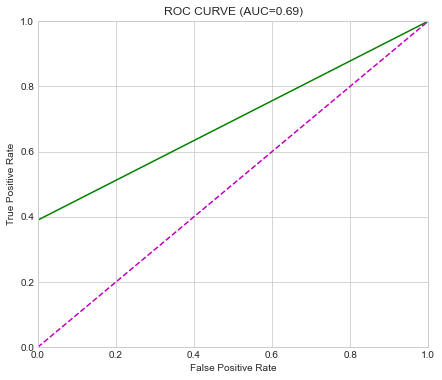

In [25]:
from sklearn.metrics import classification_report, roc_auc_score
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
Ann_scores = classification_report(y_test, y_pre_K, labels=(0, 1), target_names=("不复吸", "又复吸"))
print("knn_scores:\n", Ann_scores)

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt


FPR,TPR,threshold=roc_curve(y_test,y_pre_K,pos_label=1)

AUC=auc(FPR,TPR)
plt.figure()
plt.title('ROC CURVE (AUC={:.2f})'.format(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='g')
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.show()

# NB

The accuracy score achieved using Naive Bayes is: 48.13 %
nb_scores:
               precision    recall  f1-score   support

         不复吸       0.19      1.00      0.32        32
         又复吸       1.00      0.41      0.58       236

    accuracy                           0.48       268
   macro avg       0.59      0.71      0.45       268
weighted avg       0.90      0.48      0.55       268



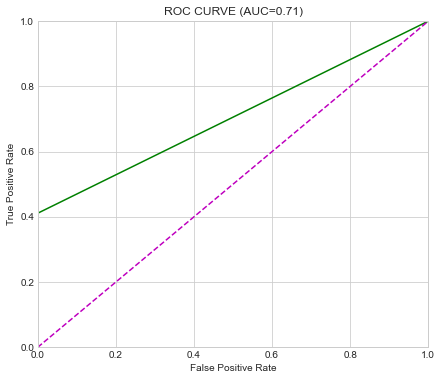

In [26]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_resample_train,y_resample_train)
y_pre_b = nb.predict(X_test)

score_nb = round(accuracy_score(y_pre_b,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

from sklearn.metrics import classification_report, roc_auc_score
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
nb_scores = classification_report(y_test, y_pre_b, labels=(0, 1), target_names=("不复吸", "又复吸"))
print("nb_scores:\n", nb_scores)

import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt


FPR,TPR,threshold=roc_curve(y_test,y_pre_b,pos_label=1)

rcParams['figure.figsize'] = 7, 6
AUC=auc(FPR,TPR)
plt.figure()
plt.title('ROC CURVE (AUC={:.2f})'.format(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(FPR,TPR,color='g')
plt.plot([0, 1], [0, 1], color='m', linestyle='--')
plt.show()


# Comparison of ROC curves of different models

In [27]:
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model

In [28]:
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

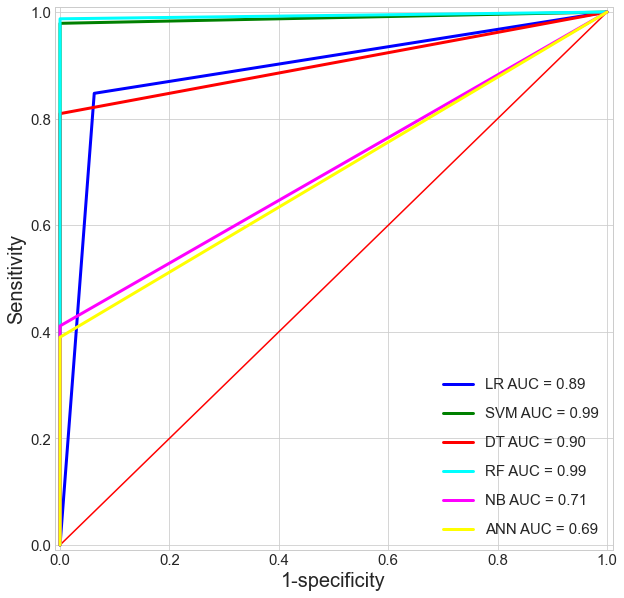

In [29]:
fig = plt.figure(figsize=(10,10)) 

models = [ 
    'LR', 
    'SVM',
     'DT', 
    'RF', 
    'NB',
    'ANN']

probs = [
    y_pre_log,
    y_pre_SVM,
    y_pre_dec,
    y_pre_randomtree,
    y_pre_b,
     y_pre_K]


colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]
    
#plt.title('Receiver Operating Characteristic',fontsize=15)
plt.plot([0, 1], [0, 1],'r-')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
# plt.ylabel('True Positive Rate',fontsize=15)
# plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('Sensitivity',fontsize=20)
plt.xlabel('1-specificity',fontsize=20)
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i],linewidth=3)
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])

font = {'weight': 'normal',
         'size': 15,
         };    
    
plt.legend(prop=font,labelspacing=1);
plt.tick_params(labelsize=15)
plt.savefig('ROC.png',dpi=600,bbox_inches="tight")
plt.show()

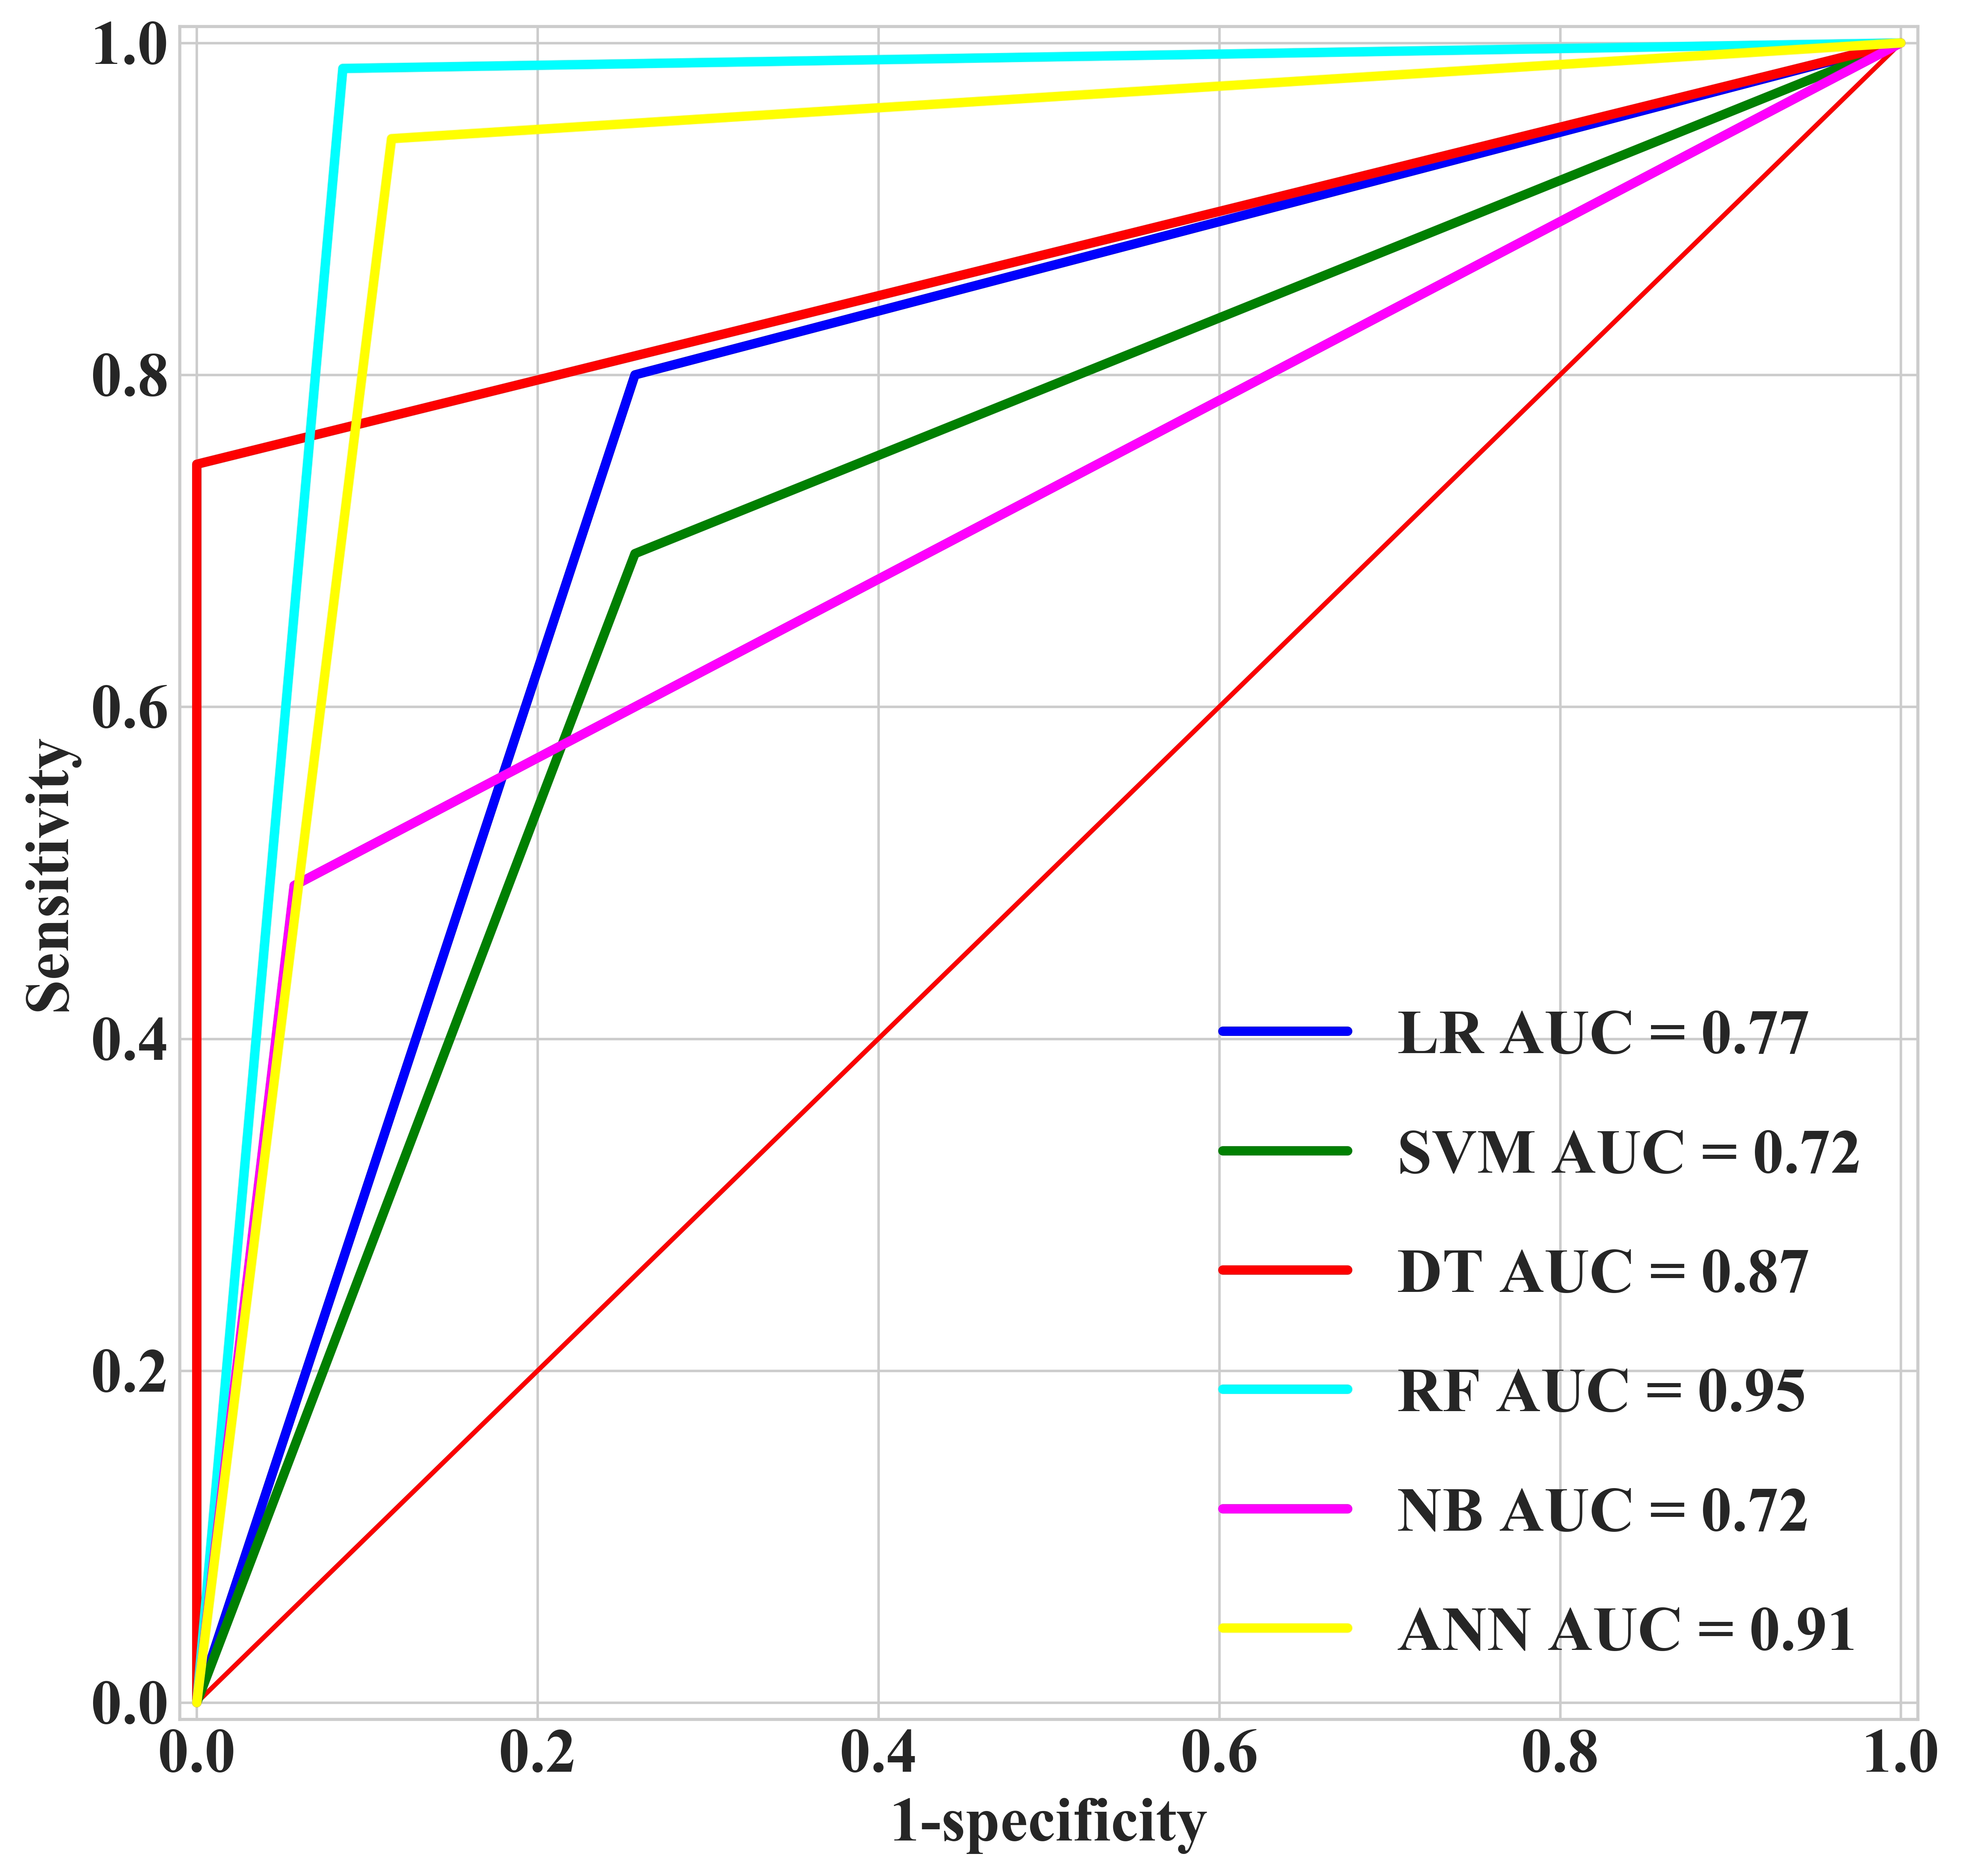